# Exercise for Graph II - Pass multiple Input to graph 
Exercise for Graph II

Your task:

Create a Graph where you pass in a single list of integers along with a name and an
operation. If the operation is a "+", you add the elements and if it is a "*", you
multiply the elements, all within the same node.

Input: {"name": "kuppu","values": [1,2,3,4], "operation": "*"}

Output: "Hi kuppu, your answer is: 24"

Hint: You need an if-statement in your node!

## Graph -2 - Excercise

# Import the required Lib 

In [1]:
from typing import Dict, TypedDict, List

In [2]:
#!pip install langgraph

In [3]:
from langgraph.graph import StateGraph

# Create the AgentState :  pass multiple type of diff i/p
# create an AgentState-shared data structure that keeps track of info as your app runs.

In [4]:
class AgentState(TypedDict): # our state schema

    values:List[int]
    name:str
    operation:str
    result:int
    


# Adding Node:

# Simple node that process values and updating the into state to keep the state up to date

In [5]:
import math

In [16]:

def cal_values(state : AgentState)-> AgentState:
    """ this function handle multiple diff i/p's"""
    print(state)
    if state['operation'] == "*" :
        state['result'] = math.prod(state['values'])   # syntax for multiple List values  
    else:
        state['result'] = "Invalid!"
        
    state['result']=f"Hi {state['name']}! your answer is: {state['result']}"
    print(state)
    return state

# Create the Grapg using stategraph in langgraph

In [7]:
graph = StateGraph(AgentState) # pass state schema


# Add Node 

In [8]:
graph.add_node("calculate",cal_values) # node name is greeter

# Add Entry point

In [9]:
graph.set_entry_point("calculate")

# Add Exit point

In [10]:
graph.set_finish_point("calculate")

# Compile the graph

In [11]:
app = graph.compile()

# Visualize the graph

In [12]:
#!pip install graphviz


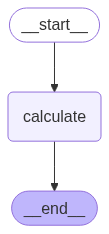

In [13]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))


 # Invoke the graph

In [21]:
anwser = app.invoke({"name": "kuppu","values":[1,2,3,4],"operation":"*"})
anwser = app.invoke({"name": "kuppu","values":[1,2,3,4],"operation":""})

{'values': [1, 2, 3, 4], 'name': 'kuppu', 'operation': '*'}
{'values': [1, 2, 3, 4], 'name': 'kuppu', 'operation': '*', 'result': 'Hi kuppu! your answer is: 24)'}
{'values': [1, 2, 3, 4], 'name': 'kuppu', 'operation': ''}
{'values': [1, 2, 3, 4], 'name': 'kuppu', 'operation': '', 'result': 'Hi kuppu! your answer is: Invalid!)'}


In [20]:
print(anwser)

{'values': [1, 2, 3, 4], 'name': 'kuppu', 'operation': '*', 'result': 'Hi kuppu! your answer is: 24)'}
